<a href="https://colab.research.google.com/github/d-h-k/w12_tf_ws/blob/master/%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EC%B2%AB%EA%B1%B8%EC%9D%8C%201%EC%9E%A5~%202%EC%9E%A5%20%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로 첫걸음 1장~ 2장 학습 
 1.   경사하강법
 2.   손실함수(비용함수)
 3.   선형회귀분석



## p41 
 - 텐서플로 예제 시작하기

In [3]:
import tensorflow as tf

a=tf.placeholder("float")
b=tf.placeholder("float")

y = tf.multiply(a,b)

sess = tf.Session()

print(sess.run(y, feed_dict={a:3, b:3}))

9.0


## 텐서보드 출력 예제, 실행안됨 -> 네이티브 환경에서 재 실행

In [8]:
tensorboard --logdir='/content'

SyntaxError: ignored

In [6]:
pwd

'/content'

## p49 변수간 관계에 대한 모델, 선형회귀분석
  - 이장에서는 가장 간단한 예제인 선형회귀분석 방법을 이용해서 변수들 사이의 관계를 분석해 보겠습니다.
  - 선형회귀는 Linear Regression 이라고 하며, 가장 간단한 형태의 알고리즘 입니다
  - 먼저 보이는 코드는 임의의 좌표를 생성하는 코드 입니다

In [0]:
import numpy as np
num_points = 1000
vectors_set = []

for i in range(num_points):
  x1 = np.random.normal(0.0, 0.55)
  y1 = x1*0.1+0.3 + np.random.normal(0.0, 0.03)
  vectors_set.append([x1,y1])
  
x_data = ia[v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

 - 아래 코드를 이용, matplotlib 라이브러리를 활용해 좌표축에 점을 찍어보겠습니다

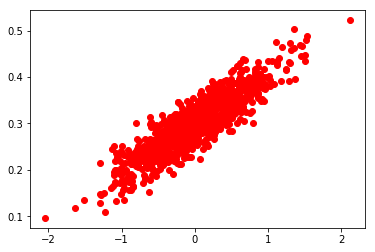

In [14]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'ro')
plt.show()

## 51p 비용함수와 경사 하강법 알고리즘
 - 학습 알고리즘을 훈련
 - 사실 우리는 위 직선이 선형회귀라는것, 그러니까 y=ax+b 형태의 방정식임을 알고있지만, 컴퓨터에게 직접 알려주지 않고 알아서 찾아가게 만드는 방법 입니다.
 - 여기서 컴퓨터(머신러닝 프레임워크) W(가중치)와 b 라는 매개변수를 계속 수정 해 가면서 답을 찾아 나갑니다
 - 지금 잘 하고 있는지 아닌지를 확인하기 위해서 비용함수를 정의합니다. 
 - 비용함수는 오차함수라고도 합니다. 결국 많은 자료들에서 말하는, Cost = error 라는 식이 성립하게 됩니다..
 - 이번 예제에서는 평균제곱오차를 사용하며, 실제 값과 알고리즘이 반복마다 추정한 값 사이의 거리를 오차로 하는 값의 평균입니다

 - 이제 텐서플로우로 변화를 추정하고 앞으로의 결과를 추론하는 시간
 - Variable 메서드 호출 시, 텐서플로 내부의 그래프 자료구에 의해 만들어질 하나의 변수를 정의함

In [0]:
import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data +b

 - 손실함수? 거리기반으로 비용함수를 제작하겠습니다. 거리 제곱의 합계의 평균을 계산하는데 이렇게 복잡하게 계산하는 이유는 양수음수가 상쇄되는것을 막기 위해서 

In [0]:
loss = tf.reduce_mean(tf.square(y-y_data))

 - 아래의 메소드는 경사하강법입니다
 ```
 GradientDescentOptimizer() 
 ```
 - train에 의해 호출되는 옵티마이조가 구현되어 있으며, 앞에서 정의한 비용함수(loss) 에다가 경사 하강법 알고리즘을 적용 함

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

## p54 텐서플로 파라미터를 설정했습니다
 - 라이러리를 불러들이고 파라미터를 설정한것 뿐이며, 실질적인 연산과 추론은 아직 실행되지 않았습니다
 - 아래 코드를 실행함으로써 최적화된 W와 b를 찾기 위한 연산(계산 혹은 작업)을 수행합니다

In [0]:
#init = tf.initialize_all_variables()
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

 - 아래 코드는 학습을 8번 시키기 위해 range(8)로 설정하였습니다.

In [33]:
for step in range(8):
  sess.run(train)
print(sess.run(W),sess.run(b))
print('Tensorflow guess : W= %f, b = %f'%(sess.run(W),sess.run(b)) )

[0.10395154] [0.2998345]
Tensorflow guess : W= 0.103952, b = 0.299834


좀더 직관적으로 그래프로 출력하기 위해서 아래와 같은 코드를 추가합니다( 매스플랏 라이브러리)

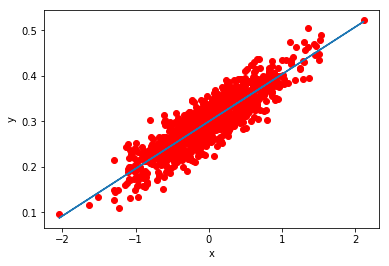

In [34]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

 - 위에 점과 텐서플로가 추측한 관계식을 그래프에서 확인할 수 있다
 - 인간이 아닌 컴퓨터가 추론을 한 예제


In [36]:
for step in range(8):
  sess.run(train)
  print(step,sess.run(W),sess.run(b))

0 [0.10395154] [0.2998345]
1 [0.10395154] [0.2998345]
2 [0.10395154] [0.2998345]
3 [0.10395154] [0.2998345]
4 [0.10395154] [0.2998345]
5 [0.10395154] [0.2998345]
6 [0.10395154] [0.2998345]
7 [0.10395154] [0.2998345]


In [37]:
for step in range(8):
  sess.run(train)
  print(step,sess.run(loss))

0 0.00082572247
1 0.00082572247
2 0.00082572247
3 0.00082572247
4 0.00082572247
5 0.00082572247
6 0.00082572247
7 0.00082572247


 - 아니 뭐야 처음부터 답을 알고있잖아?!?!? 이게 아닌데..?

## p60 지금 까지 코드 한방정리

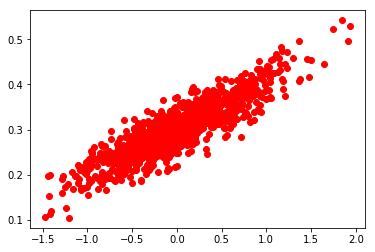

0 [0.52380574] [0.29348862]
0 0.055664994


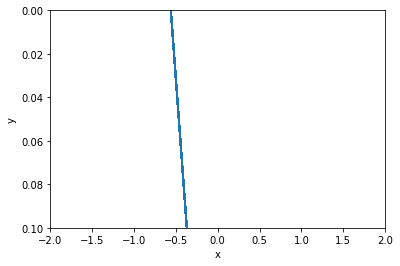

1 [0.39455545] [0.29563433]
1 0.027339248


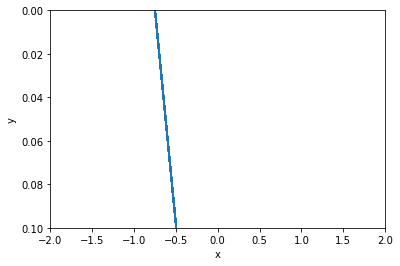

2 [0.30471253] [0.29716665]
2 0.013652731


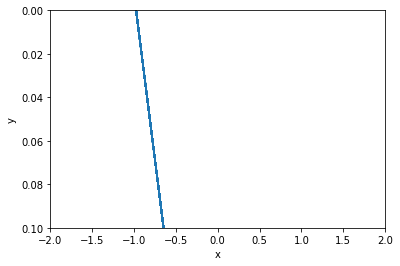

3 [0.24226147] [0.29823178]
3 0.007039635


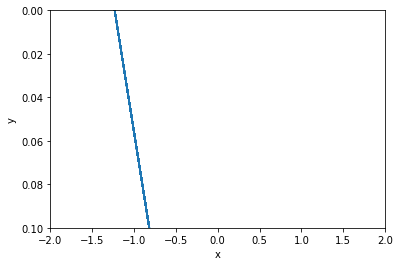

4 [0.19885087] [0.2989722]
4 0.0038442984


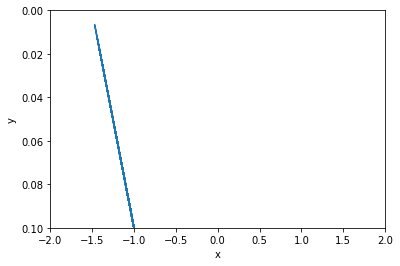

5 [0.16867557] [0.29948685]
5 0.0023003656


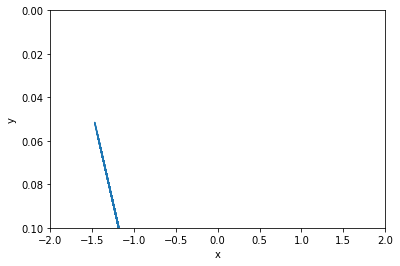

6 [0.14770031] [0.29984456]
6 0.0015543638


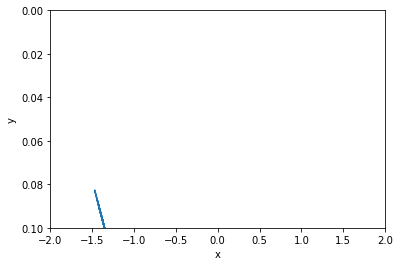

7 [0.13312012] [0.30009326]
7 0.0011939085


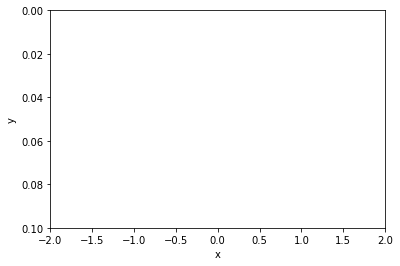

In [42]:
import numpy as np

num_points = 1000
vectors_set = []

for i in range(num_points):
  x1 = np.random.normal(0.0, 0.55)
  y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
  vectors_set.append([x1,y1])
  
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro')
plt.show()

import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data +b

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(8):
  sess.run(train)
  print(step, sess.run(W), sess.run(b))
  print(step, sess.run(loss))
  
  plt.plot(x_data, y_data, 'ro')
  plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
  plt.xlabel('x')
  plt.xlim(-2,2)
  plt.ylim(0.1, 0,6)
  plt.ylabel('y')
  plt.show()
  

 - 이상으로 선형회귀분석 알고리즘을 사용해서 두개의 필수적인 개념인 비용함수와 경사하강법 알고리즘을 살펴봤습니다.